In [114]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'
import csv
import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd
import math

# Question 1

### Write a short program to compute estimates for the following turbulence quantities:

## Example 1 : Pipe flow [Internal flow]

In [17]:

Re = 10000      # [-]
nu = 1e-06      # m^2/s
U  = 0.1        # m/s
X  = 0.1        # Diameter of pipe [meters]
rho = 1000      # kg/m^3

In [ ]:
# Integeral eddy scale (l) [meters] 
l = 0.7*X            # For a pipe flow 70 % of the pipe diameter is considered
# l = 0.09*k^(3/2)/E   # or for available estimates of E (Energy dissipation rate per unit masst) 
                       # and k (Turbulent kinetic energy per mass)

# Turbulence intensity (I_t)  [-]
I_t = sqrt(2*K/3)    # for isotropic trubulence 

#Turbulent kinetic energy (k)  [m^2/s^2]
K = (3/2)* (I_t*U)**2    # the product of the turbulence intensity and the free stream velocity     

# Turbulent dissipation rate (E)  [m^2/s^3]

E = 0.09*l*K**(2/3)     # for known values of l and k values

# Specific dissipation rate w.[1/s]

W = E/(k*0.09)         # for known values of E and k 

# Turbulence viscosity (v_t) [m^2/s]

V_t = rho*K/W          # for known rho, K and W

# Kolmogorov length scale lo. [m]

lo = (nu**3/E)**(1/4)    # for known nu,E 

# kolmogorov time scale (to). [s]

to = (nu/E)**(1/2)     # for known nu and E

# kolomogorov velocity scale (uo). [m/s]

uo= (nu*E)**(1/4)      # for known nu and E

# Taylor length scale [la]. [meters]

la = (10*nu*K/E)**(1/2)  # for known nu, K and E

# Reynolds turbulencec number (Re_t). [-]

Re_t = K**2/(E*nu)       # for known K,nu and E

# Friction coeffecient (C_f).[-]

C_f =0.058*Re**(-0.2)    # for known Reynolds number


# y+ for (yplus).[m]

tau = 0.5*C_f*rho*U     # compute the wall shear stress 
u_t =sqrt(tau/rho)      # compute the shear velocity
yplus = y*u_t/nu        # compute the yplus for yplus less than 10 in the viscous layer 


# Example 2 : Channel flow [External flow]

In [15]:
# Example one : pipe flow [External flow]
Re = 10000      # [-]
nu = 1e-06      # m^2/s
U = 0.1        # m/s
X  = 0.1        # Channel height [meters]

# Question 2

### Plot the Kolmogorov length scale and viscous sublayer in function of the Reynolds number, as the example shown in figure 1. You are asked to plot the viscous sublayer for three different target y+ values; namely, y+ = 0.1, y+ = 1, and y+ = 7.

array([1.000000e+00, 1.999999e+00, 2.999998e+00, ..., 9.999980e+05,
       9.999990e+05, 1.000000e+06])

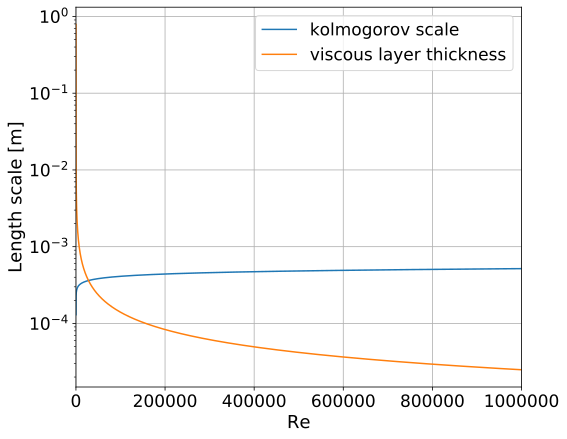

In [118]:
Re  = np.linspace(1,1000000,1000001) #start = 0, stop = 100, num = 5)
rho = 1000 
nu =  0.000001            # m^2/s
U  =  0.1                 #[m/s] 
X  =  0.2                 # [m]

yPlus_1=0.1
yPlus_2=1
yPlus_3=7

# viscous length scale (y): [m]

C_f =0.058*Re**(-0.2)       # for known Reynolds number
tau = 0.5*C_f*rho*U         # compute the wall shear stress

results = []
for val in tau:
    u_t =math.sqrt(val/rho)     # compute the shear velocity
    results.append(u_t)
u_tt = np.hstack(results)    
    
y_1 = yPlus_1*nu/u_tt        # compute the y for known values of yplus, nu and u_t  
y_2 = yPlus_2*nu/u_tt        # compute the y for known values of yplus, nu and u_t  
y_3 = yPlus_3*nu/u_tt        # compute the y for known values of yplus, nu and u_t  

lo = 0.7*X/(Re/10)**(3/4)            # kolomogrove length scale as function of Re and X

plt.rcParams['figure.figsize'] = (8,7)
plt.rcParams.update({'font.size':17})
plt.semilogy(Re,y_3,'-',label='kolmogorov scale')
plt.semilogy(Re,lo,'-',label='viscous layer thickness')

plt.xlabel('Re',fontsize=18)
plt.ylabel('Length scale [m]',fontsize=18)
plt.xlim(0,1000000)
#plt.ylim(0.000001,0.001)
plt.grid()

plt.legend(loc=0)

Re